In [ ]:
import json
import os

!pip install kaggle

api_token = {"username":"grozental","key":"54907d9041ac43e8165000d5df2f2f86"}


!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# Part 1 - ATP_Tennis

In [ ]:
!kaggle datasets download -d guillemservera/tennis
!unzip tennis.zip -d ./database

100% 117M/117M [00:00<00:00, 188MB/s] 
100% 117M/117M [00:00<00:00, 176MB/s]
Archive:  tennis.zip
  inflating: ./database/database.sqlite  
  inflating: ./database/tennis_atp/atp_matches_1968.csv  
  inflating: ./database/tennis_atp/atp_matches_1969.csv  
  inflating: ./database/tennis_atp/atp_matches_1970.csv  
  inflating: ./database/tennis_atp/atp_matches_1971.csv  
  inflating: ./database/tennis_atp/atp_matches_1972.csv  
  inflating: ./database/tennis_atp/atp_matches_1973.csv  
  inflating: ./database/tennis_atp/atp_matches_1974.csv  
  inflating: ./database/tennis_atp/atp_matches_1975.csv  
  inflating: ./database/tennis_atp/atp_matches_1976.csv  
  inflating: ./database/tennis_atp/atp_matches_1977.csv  
  inflating: ./database/tennis_atp/atp_matches_1978.csv  
  inflating: ./database/tennis_atp/atp_matches_1979.csv  
  inflating: ./database/tennis_atp/atp_matches_1980.csv  
  inflating: ./database/tennis_atp/atp_matches_1981.csv  
  inflating: ./database/tennis_atp/atp_matches_1

In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:///database/database.sqlite

In [ ]:
##Q1
%%sql
SELECT ioc, COUNT(*) AS number_of_players
FROM players
GROUP BY ioc ORDER BY number_of_players DESC
LIMIT 5

 * sqlite:///database/database.sqlite
Done.


ioc,number_of_players
USA,13074
AUS,3259
GBR,3189
ESP,3017
GER,2669


In [ ]:
##Q2
%%sql
SELECT *
FROM players
WHERE name_last LIKE 'SON%'
LIMIT 5

 * sqlite:///database/database.sqlite
Done.


player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
100853,Dong Wook,Song,L,19620820.0,KOR,175.0,Q7560983
102454,Hyeong Keun,Song,R,19740916.0,KOR,None,None
103001,Gavin,Sontag,U,19770610.0,USA,None,Q55314934
105621,Min Kyu,Song,U,19900825.0,KOR,None,Q55397069
111729,Shan,Sondhu,U,19880117.0,USA,None,None


In [ ]:
##Q3
%%sql
SELECT p.name_first, p.name_last
FROM players p LEFT JOIN (SELECT loser_id, COUNT(*) as loss_count FROM matches GROUP BY loser_id) l ON p.player_id = l.loser_id
WHERE IFNULL(l.loss_count, 0) < 2
LIMIT 5

 * sqlite:///database/database.sqlite
Done.


name_first,name_last
Zdenek,Slizek
George,Glowa
Ulises,Quezada
Chiraid,Mukherjea
David,Parker


In [ ]:
##Q4
%%sql
SELECT name_first, name_last
FROM players
WHERE player_id IN (SELECT player FROM rankings WHERE points > (SELECT AVG(points) FROM rankings))
LIMIT 5

 * sqlite:///database/database.sqlite
Done.


name_first,name_last
Jimmy,Connors
Kevin,Curren
Johan,Kriek
Fernando,Luna
Brad,Drewett


In [ ]:
##Q5
%%sql
SELECT hand, AVG(height) AS average_height
FROM players
GROUP BY hand

 * sqlite:///database/database.sqlite
Done.


hand,average_height
None,None
A,180.25
L,183.5611111111111
R,183.82128013300084
U,181.03571428571428


In [ ]:
##Q6
%%sql
SELECT name_first, name_last, ioc
FROM players
WHERE player_id IN (SELECT player FROM rankings WHERE points > -1000)
LIMIT 5

 * sqlite:///database/database.sqlite
Done.


name_first,name_last,ioc
Wieslaw,Gasiorek,POL
Jan,Kukal,CZE
Jan,Kodes,CZE
Toshiro,Sakai,JPN
Jim,Ward,USA


In [ ]:
##Q7
%%sql
SELECT ioc, AVG(points) AS average_rating
FROM players p JOIN rankings r ON p.player_id = r.player
GROUP BY ioc HAVING COUNT(p.player_id) > 10
LIMIT 5

 * sqlite:///database/database.sqlite
Done.


ioc,average_rating
None,15.446428571428571
AHO,24.6797583081571
ALG,36.079569001243264
AND,9.924768518518519
ANT,4.778656126482214


In [ ]:
##Q8
%%sql
SELECT DISTINCT p1.name_first, p1.name_last
FROM matches m JOIN players p1 ON m.winner_id = p1.player_id JOIN players p2 ON m.loser_id = p2.player_id
WHERE p2.hand = 'L' INTERSECT SELECT DISTINCT p3.name_first, p3.name_last FROM matches m JOIN players p3 ON m.loser_id = p3.player_id JOIN players p4 ON m.winner_id = p4.player_id
WHERE p4.hand = 'L'
LIMIT 5

 * sqlite:///database/database.sqlite
Done.


name_first,name_last
Aaron,Addison
Aaron,Cortes Alcaraz
Aaron,Dujovne
Aaron,Krickstein
Aaron,Leeder Chard


#Part 2 - POKEMONS

In [ ]:
!kaggle datasets download -d lrcusack/pokemontrainers
!unzip pokemontrainers.zip -d ./database_1

  0% 0.00/801k [00:00<?, ?B/s]
100% 801k/801k [00:00<00:00, 111MB/s]
Archive:  pokemontrainers.zip
  inflating: ./database_1/database.sqlite  


In [ ]:
%sql sqlite:///database_1/database.sqlite

In [ ]:
##Q1
%%sql
SELECT DISTINCT Trainers.trainername, Pokemon.pokelevel
FROM Pokemon
JOIN Trainers ON Pokemon.trainerID = Trainers.trainerID
WHERE Pokemon.pokelevel = (SELECT MAX(pokelevel) FROM Pokemon)
LIMIT 5

   sqlite:///database/database.sqlite
 * sqlite:///database_1/database.sqlite
Done.


trainername,pokelevel
Cool♀,100
Cool♂,100
Cooltrainer♀ Floria,100
Cooltrainer♂ Marty,100
Cooltrainer♂ Forgon,100


In [ ]:
##Q2
%%sql
SELECT Pokemon.pokename, Trainers.trainername
FROM Pokemon
JOIN Trainers ON Pokemon.trainerID = Trainers.trainerID
WHERE Pokemon.pokename LIKE '%p%' AND Trainers.trainername LIKE '%a%'
LIMIT 5

   sqlite:///database/database.sqlite
 * sqlite:///database_1/database.sqlite
Done.


pokename,trainername
Vileplume,Ace Duo Elina & Sean
Weepinbell,Cooltrainer♀
Persian,Cooltrainer♀
Parasect,Cooltrainer♀
Bellsprout,Cooltrainer♀


In [ ]:
##Q3
%%sql
SELECT Trainers.trainername, COUNT(Pokemon.trainerID) as num_pokemon
FROM Pokemon
JOIN Trainers ON Pokemon.trainerID = Trainers.trainerID
GROUP BY Pokemon.trainerID
ORDER BY num_pokemon DESC
LIMIT 5

   sqlite:///database/database.sqlite
 * sqlite:///database_1/database.sqlite
Done.


trainername,num_pokemon
Youthful Couple River,6
Youngster Wyatt,6
Youngster Wyatt,6
Youngster Wyatt,6
Youngster Wyatt,6


# Part 3 - Titanic

In [ ]:
%sql sqlite:////content/titanic.db

In [ ]:
##Q1
%%sql
SELECT COUNT(ticket)
FROM titanic
WHERE pclass=1 AND fare>50

 * sqlite:////content/titanic.db
   sqlite:///database/database.sqlite
   sqlite:///database_1/database.sqlite
Done.


COUNT(ticket)
209


In [ ]:
##Q2
%%sql
SELECT t1.fare as fare1, t2.fare as fare2
FROM titanic as t1 JOIN titanic as t2
WHERE t1.pclass=1 AND t2.pclass=2 AND t1.fare<t2.fare AND t1.fare != 0
ORDER BY t2.fare
LIMIT 1

 * sqlite:////content/titanic.db
   sqlite:///database/database.sqlite
   sqlite:///database_1/database.sqlite
Done.


fare1,fare2
5.0,9.6875


In [ ]:
##Q3
%%sql
SELECT COUNT(ticket)
FROM titanic
WHERE name like "%Jack %"

 * sqlite:////content/titanic.db
   sqlite:///database/database.sqlite
   sqlite:///database_1/database.sqlite
Done.


COUNT(ticket)
0


In [ ]:
##Q4
%%sql
SELECT pclass, sex, COUNT(ticket) as "total", SUM(survived) as Survivors, SUM(survived) *100.0/ COUNT(ticket) AS Percentage
FROM titanic
GROUP BY pclass, sex

 * sqlite:////content/titanic.db
   sqlite:///database/database.sqlite
   sqlite:///database_1/database.sqlite
Done.


pclass,sex,total,Survivors,Percentage
None,None,0,None,None
1,female,144,139,96.52777777777777
1,male,179,61,34.07821229050279
2,female,106,94,88.67924528301887
2,male,171,25,14.619883040935672
3,female,216,106,49.074074074074076
3,male,493,75,15.212981744421906


# Part 4 - ERD

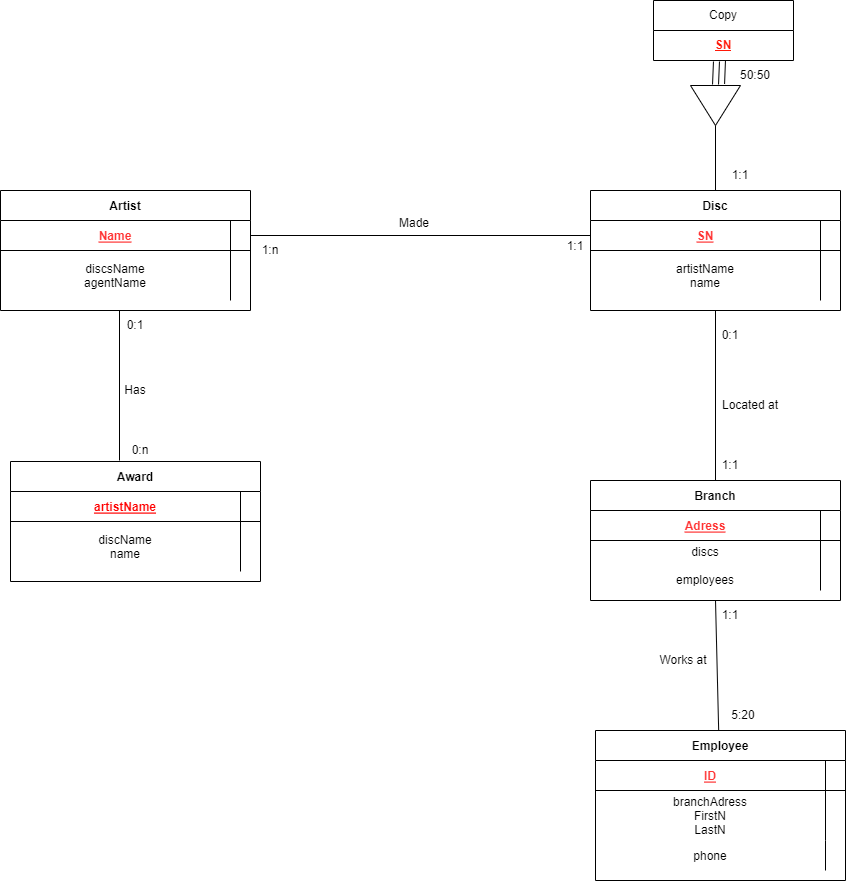